In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read the CSV file  ../Data/Breast_Cancer_Diagnostic.csv

In [2]:
# Loding the dataset into pandas dataframe.
df = pd.read_csv('data_banknote_authentication.csv')

In [3]:
# print all the available features.
df.columns

Index(['variance', 'skew', 'kurtosis', 'entropy', 'authentic'], dtype='object')

In [4]:
# Check for nulls.
df.columns[df.isnull().any()]

Index([], dtype='object')

In [5]:
# Count the number of malignants and benigns in the dataset.
df['authentic'].value_counts()

0    762
1    610
Name: authentic, dtype: int64

In [6]:
df.groupby('authentic').quantile([0.25,0.5,0.75])

variance      skew  kurtosis   entropy
authentic                                             
0         0.25  0.883345  0.450063 -1.709700 -2.228250
          0.50  2.553100  5.668800  0.700605 -0.552380
          0.75  3.884450  8.691975  2.652925  0.423258
1         0.25 -3.061450 -5.810025 -1.357500 -2.458375
          0.50 -1.806100  0.172775  0.373720 -0.661650
          0.75 -0.541770  3.189275  5.626350  0.341790

In [7]:
df.head(n=2)

,variance,skew,kurtosis,entropy,authentic
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0


In [8]:
df.sample(n=10, random_state=50).sort_values(['variance'])

,variance,skew,kurtosis,entropy,authentic
852,-4.886100,7.0542,-0.172520,-6.959000,1
1183,-3.574100,3.9440,-0.079120,-2.120300,1
543,-1.421700,11.6542,-0.057699,-7.102500,0
885,0.030219,-1.0512,1.402400,0.773690,1
1032,0.163580,-3.3584,1.374900,1.356900,1
262,1.811400,7.6067,-0.978800,-2.466800,0
158,2.263400,-4.4862,3.655800,-0.612510,0
663,3.779800,-3.3109,2.649100,0.066365,0
585,4.339800,-5.3036,3.880300,-0.704320,0
364,5.782300,5.5788,-2.408900,-0.056479,0


In [9]:
dfsubset = df.sample(n=10, random_state=50).sort_values(['variance'])[0:5]
dfsubset.sort_values(['skew'])

,variance,skew,kurtosis,entropy,authentic
1032,0.163580,-3.3584,1.374900,1.35690,1
885,0.030219,-1.0512,1.402400,0.77369,1
1183,-3.574100,3.9440,-0.079120,-2.12030,1
852,-4.886100,7.0542,-0.172520,-6.95900,1
543,-1.421700,11.6542,-0.057699,-7.10250,0


## Create the Dataframe of features (X) and the target (Y) variables

In [10]:
# Load the features to a variable X
# X is created by simply dropping the diagnosis column and retaining all others
X = df.drop('authentic', axis = 1)

# Load the target variable to y
y = df['authentic']

## Split Test Train

**> Train-Test split -** We split our data into two parts, namely, the train set and the test set (ideally its a 70-30 train-test split which is upto you). We then try to build our function f(x) (aka model) using the train set and see how well it does on the test set.   

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## Create an Instance of the classifier and train it.

In [12]:
# Let's create an instance for the LogisticRegression model and then train it with the training set.
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(random_state=0, min_samples_leaf=10)
Classifier.fit(X_train,y_train)

C:\Users\subhrajit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## Get the Predictions

In [13]:
# Getting predictions from the model 
y_test_hat = Classifier.predict(X_test)

# Compare the predicted values with the actuals.
Results = pd.DataFrame({'Actual': y_test})
column = pd.DataFrame({'Predictions': y_test_hat})
Results = Results.join(column.set_index(Results.index))
Results.head(5)

,Actual,Predictions
1240,1,1
703,0,0
821,1,1
1081,1,1
37,0,0


### 1. The accuracy scores

It is simply calculated as number of classes predicted right divided by total number of samples.

In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_hat))

0.9830097087378641


In [15]:
# Get the predictions from the model for the training set. 
y_train_hat = Classifier.predict(X_train)
print(accuracy_score(y_train, y_train_hat))

0.9875


### 2. The confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score
 
cm = confusion_matrix(y_test, y_test_hat)
print(cm)

[[229   6]
 [  1 176]]


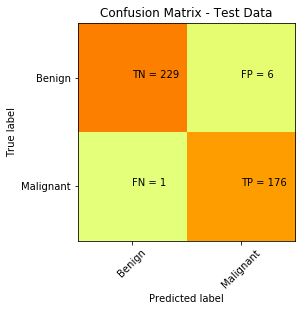

In [17]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Benign','Malignant']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(2)
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

<b> DOMAIN KNOWLEDGE : </b> 
<br>It plays a very big role in solving a machine learning problem. If you know your data in and out thats when you would be getting best results. For this instance we would want to minimise FN more than anything else. Why?

In [18]:
# Assigning Variables for convinience
TN = 229
FP = 6
FN = 1
TP = 176

sensitivity = TP / float(FN + TP)
print("Sensitivity:", sensitivity)

precision = TP / float(TP + FP)
print("Precision:", precision)

specificity = TN / (TN + FP)
print("Specificity:", specificity)

Sensitivity: 0.9943502824858758
Precision: 0.967032967032967
Specificity: 0.9744680851063829
